In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_data.csv')
pd.options.display.float_format = '{:,.2f}'.format
df=df[df['category'] == 'Car']
df.head()

,month,account_id,region,category,spend_level,revenue,live_ad,new_AA,paid_ad,listing_fee,...,multi_bump_feature,sa_feature,other_feature,shop_feature,adview_received,adview_per_live_ad_per_day,lead_received,lead_per_live_ad_per_day,spending_per_paid_ads,spending_per_live_ad
0,2020-10-01,7,HN,Car,light,13636,NaN,NaN,1,0,...,0,0,0,0,NaN,NaN,NaN,NaN,"13,636.00",NaN
1,2020-11-01,7,HN,Car,light,40909,NaN,NaN,2,0,...,0,0,0,0,NaN,NaN,NaN,NaN,"20,454.50",NaN
2,2020-12-01,7,HN,Car,light,272727,6.00,2.00,2,2,...,0,0,0,1,800.00,16.67,35.00,0.73,"136,363.50","45,454.50"
3,2021-01-01,7,HN,Car,light-medium,909091,16.00,11.00,13,8,...,0,0,0,0,"9,023.00",38.23,202.00,0.86,"69,930.08","56,818.19"
4,2021-02-01,7,HN,Car,medium,1036364,11.00,3.00,6,1,...,0,0,0,1,"5,132.00",29.66,76.00,0.44,"172,727.33","94,214.91"


In [3]:
df['month'] = pd.to_datetime(df['month'])
df['month_ex'] = df['month'].dt.month
df['month_ex'].unique()

array([10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27198 entries, 0 to 73346
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   month                       27198 non-null  datetime64[ns]
 1   account_id                  27198 non-null  int64         
 2   region                      27198 non-null  object        
 3   category                    27198 non-null  object        
 4   spend_level                 27198 non-null  object        
 5   revenue                     27198 non-null  int64         
 6   live_ad                     25191 non-null  float64       
 7   new_AA                      25191 non-null  float64       
 8   paid_ad                     27198 non-null  int64         
 9   listing_fee                 27198 non-null  int64         
 10  bump_feature                27198 non-null  int64         
 11  multi_bump_feature          27198 non-null  int64     

In [5]:
df.month_ex.nunique()

7

Missing Data displayed in %

In [6]:
missing = df.isna().sum()

missing_per = missing/len(df['account_id'])*100
missing_per.sort_values(ascending=False)

lead_per_live_ad_per_day     8.63
lead_received                8.63
adview_per_live_ad_per_day   7.43
adview_received              7.43
spending_per_live_ad         7.38
live_ad                      7.38
new_AA                       7.38
spending_per_paid_ads        0.18
month                        0.00
sa_feature                   0.00
shop_feature                 0.00
other_feature                0.00
multi_bump_feature           0.00
account_id                   0.00
bump_feature                 0.00
listing_fee                  0.00
paid_ad                      0.00
revenue                      0.00
spend_level                  0.00
category                     0.00
region                       0.00
month_ex                     0.00
dtype: float64

#### Average revenue generated by each spend_level

In [7]:
grouped = df.groupby('spend_level')
original_mean_revenue = grouped['revenue'].mean()
original_mean_revenue

spend_level
heavy          5,123,637.17
light            151,445.89
light-medium     757,992.63
medium         1,407,771.61
medium-heavy   2,479,032.30
Name: revenue, dtype: float64

<AxesSubplot:xlabel='spend_level', ylabel='Count'>

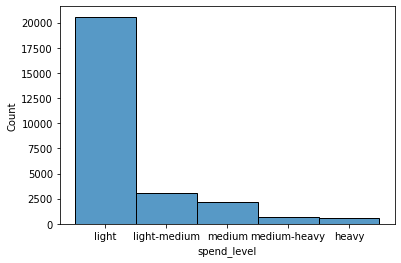

In [8]:
import seaborn as sns

sns.histplot(df['spend_level'])

In [9]:
spend_level = df.groupby('spend_level')
spend_level.revenue.sum().sort_values(ascending=False)

spend_level
heavy           3212520504
light           3117816509
medium          3109767486
light-medium    2339165254
medium-heavy    1708053253
Name: revenue, dtype: int64

### Amount of unique user per spend_level

In [10]:
spend_level['account_id'].nunique()

spend_level
heavy            168
light           5118
light-medium    1184
medium           762
medium-heavy     294
Name: account_id, dtype: int64

In [11]:
df.groupby(['spend_level', 'account_id']).revenue.sum().sort_values(ascending=False)

spend_level  account_id
heavy        16732         278821732
             720041        170509259
             3542          110818765
             9733039        84875667
             1197961        82073167
                             ...    
light        21499001              0
             12706339              0
             5359520               0
             21765301              0
             1197961               0
Name: revenue, Length: 7526, dtype: int64

In [12]:
spend_level['bump_feature'].sum()

spend_level
heavy           120327
light            99405
light-medium     79241
medium          115924
medium-heavy     62750
Name: bump_feature, dtype: int64

## Seperating light and light-medium user for analysis

In [13]:
df_light = df[df['spend_level'].isin(['light', 'light-medium'])]

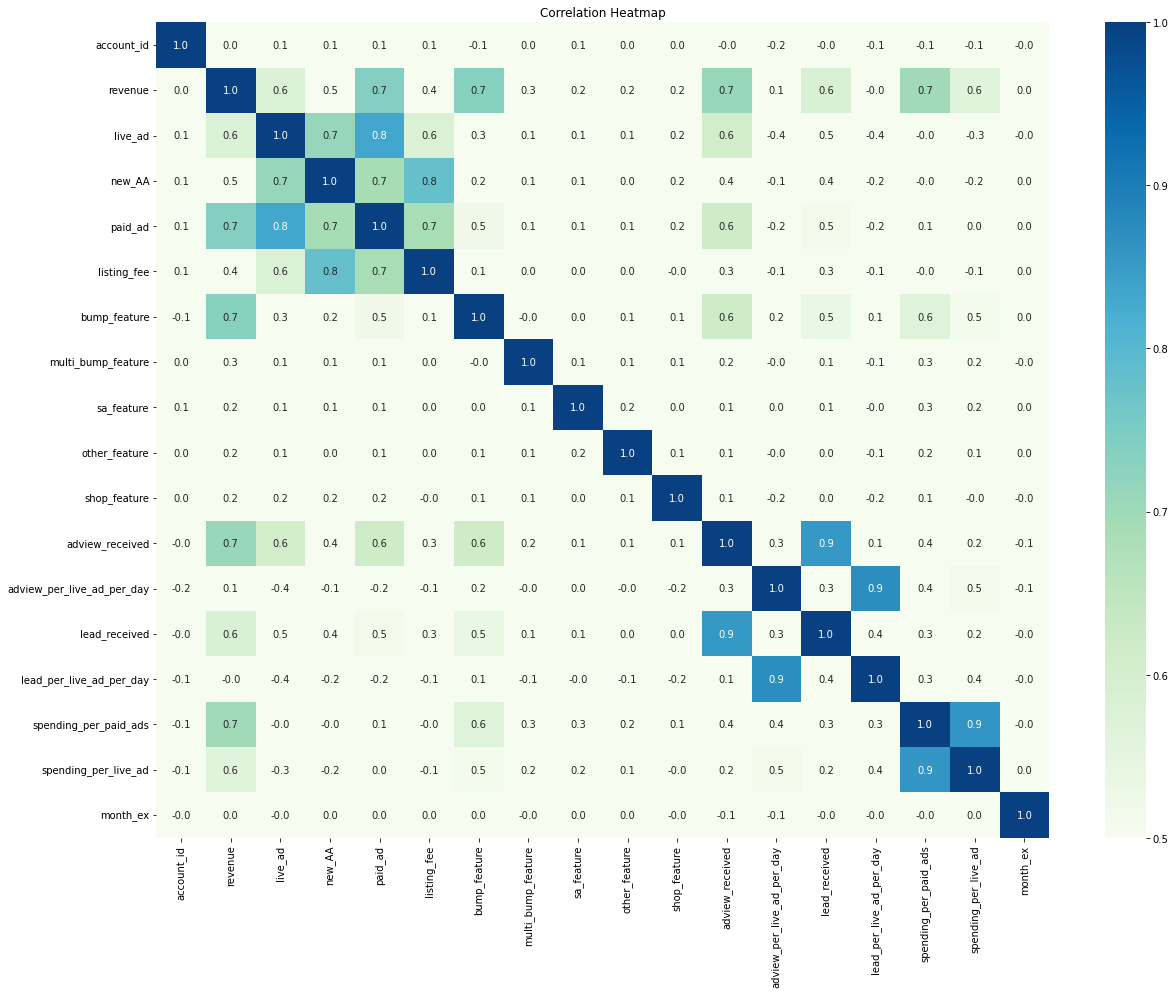

In [14]:
corr_mat_spearman = df_light.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat_spearman,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

In [15]:
df_high = df[df['spend_level'].isin(['light', 'light-medium', 'medium', 'medium-heavy'])]

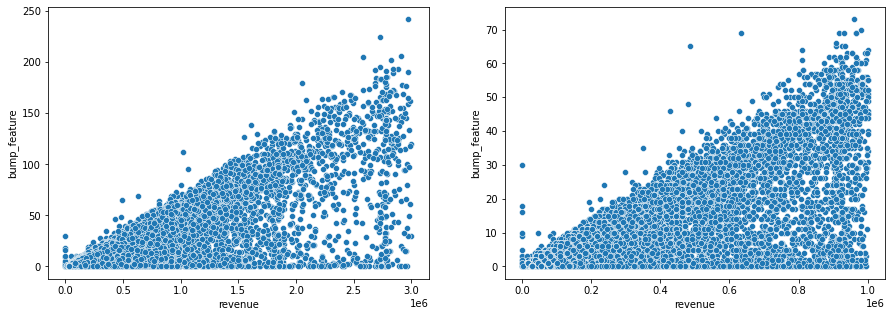

In [16]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['bump_feature'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['bump_feature'], x=df_light['revenue'])
plt.show()

Scatter shows high bump_feature usage **correlately strongly** with revenue. But interestingly, higher revenue does not indicate higher bump usage.

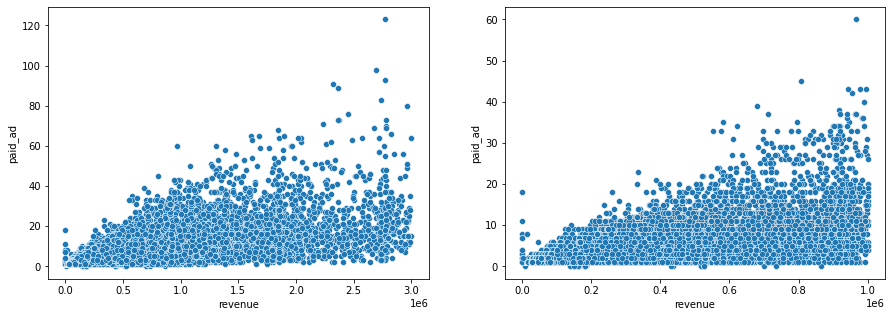

In [17]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['paid_ad'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['paid_ad'], x=df_light['revenue'])
plt.show()

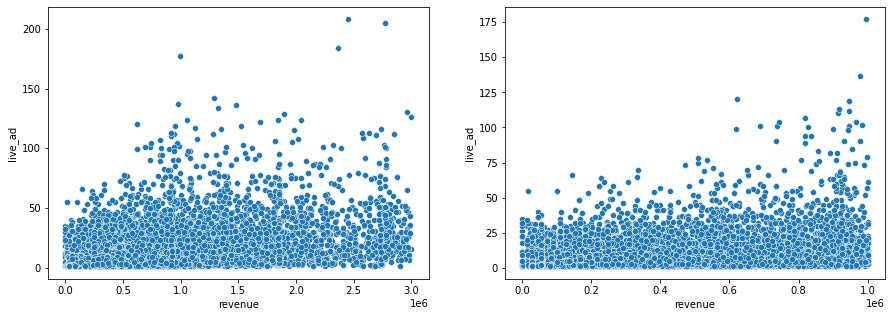

In [18]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['live_ad'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['live_ad'], x=df_light['revenue'])
plt.show()

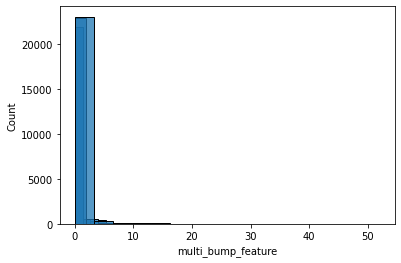

In [19]:
sns.histplot(df_light['multi_bump_feature'])
sns.histplot(df_light['sa_feature'])
sns.histplot(df_light['other_feature'])
plt.show()

<AxesSubplot:xlabel='revenue'>

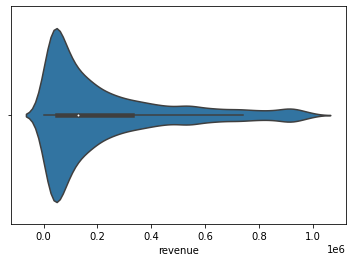

In [20]:
sns.violinplot(x=df_light.revenue)

<AxesSubplot:xlabel='revenue', ylabel='Proportion'>

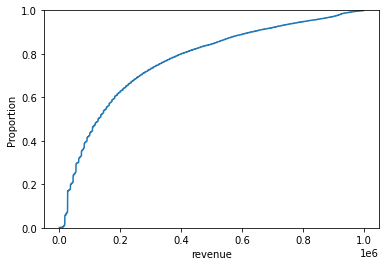

In [21]:
sns.ecdfplot(df_light.revenue)

CDF shows 80% of light and light-medium users spent about 400,000 or less. The longtail on Violin plot indicates a small amount of outliers, spending up to 1,000,000.

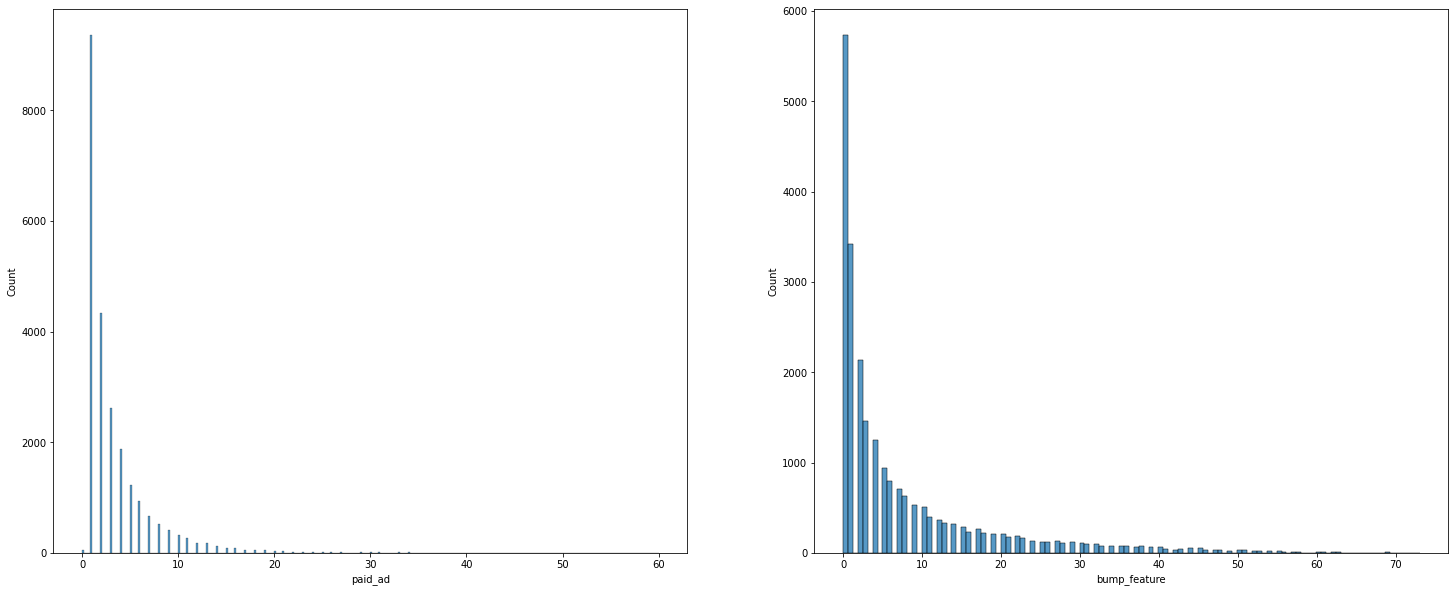

In [22]:
col = ['paid_ad', 'bump_feature']
fig,axes= plt.subplots(1,2, figsize=(25,10))
for u, i in enumerate(col):
    sns.histplot(df_light[i],ax=axes[u])
plt.show()

Int64Index([1, 2, 3, 4, 10, 11, 12], dtype='int64', name='month_ex')


<AxesSubplot:xlabel='month_ex'>

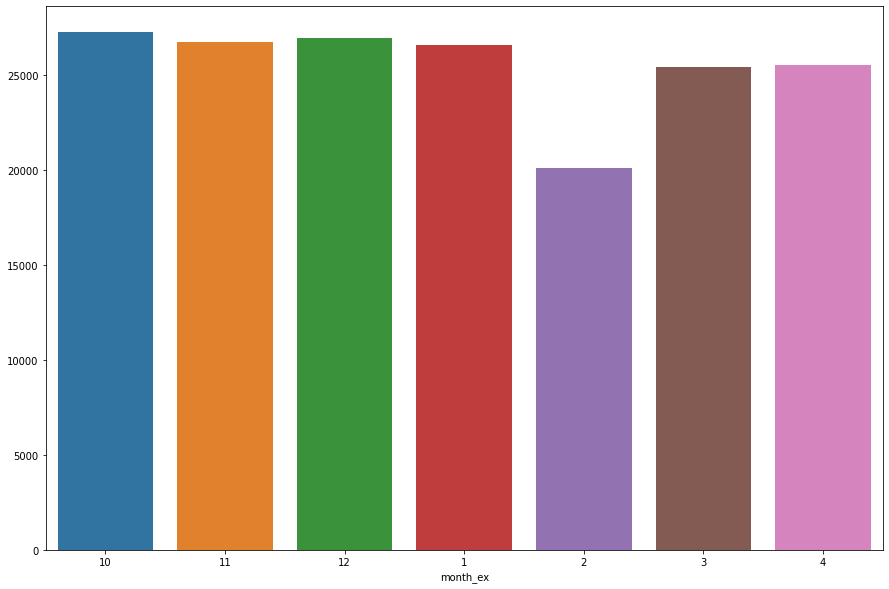

In [23]:
month = df_light.groupby('month_ex')
X = month.bump_feature.sum()
print(X.index)
plt.figure(figsize=(15,10))
sns.barplot(y=X.values,x=X.index,order=[10,11,12,1,2,3,4])

Recalculate correlation using Spearman to eliminiate outliers and skewed distributions, takes into account non-linear relationship.

----
### Detecting "LOST", aka the amount of user leaving the platform starting in January. 

In [24]:
beg_period = [10,11,12,1,2]
end_period = [3,4]
active_month = df.groupby('account_id').month_ex.unique()
bool_res = []
for i in active_month:
    bool_res.append(
        any(np.in1d(i,beg_period)) and not(any(np.in1d(i, end_period))) ## if one element is in beg_period and none in end_period
    )
leaving_user = active_month[bool_res]
leaving_user

account_id
317             [11, 12]
1116                 [1]
2091        [10, 11, 12]
2266                [11]
2479                 [2]
                ...     
22035114             [1]
22126849             [2]
22148711             [2]
22167023             [2]
22192363             [2]
Name: month_ex, Length: 1699, dtype: object

In [25]:
df_lost = df.loc[df['account_id'].isin(leaving_user.index)]

In [26]:
df_lost['account_id'].nunique()

1699

In [27]:
df_lost_grouped = df_lost.groupby('spend_level')
print(df_lost_grouped.revenue.mean())

spend_level
heavy          4,349,470.50
light             97,759.28
light-medium     747,774.12
medium         1,371,063.27
medium-heavy   2,423,115.78
Name: revenue, dtype: float64


---
### Comparing attributes of revenue and ad between lost and original_group

In [28]:
per_difference = df_lost_grouped['bump_feature'].mean()/grouped['bump_feature'].mean()
lost_bump = df_lost_grouped['bump_feature'].mean()
ori_bump = grouped['bump_feature'].mean()
bump_ad_comparision = pd.concat([lost_bump,ori_bump,per_difference], keys=["bump_feature lost group", "bump_feature original group","% lost/original"], axis=1)
bump_ad_comparision

,bump_feature lost group,bump_feature original group,% lost/original
spend_level,,,
heavy,70.43,191.91,0.37
light,2.50,4.83,0.52
light-medium,18.82,25.68,0.73
medium,36.18,52.48,0.69
medium-heavy,47.88,91.07,0.53


In [29]:
per_difference = df_lost_grouped['live_ad'].mean()/grouped['live_ad'].mean()
lost_live = df_lost_grouped['live_ad'].mean()
ori_live = grouped['live_ad'].mean()
live_ad_comparision = pd.concat([lost_live,ori_live,per_difference], keys=["live_ad lost group", "live_ad original group","% lost/original"], axis=1)
live_ad_comparision

,live_ad lost group,live_ad original group,% lost/original
spend_level,,,
heavy,20.64,38.09,0.54
light,2.72,4.06,0.67
light-medium,11.66,13.92,0.84
medium,18.68,20.86,0.90
medium-heavy,18.43,29.82,0.62


In [30]:
per_difference_rev = df_lost_grouped['revenue'].mean()/grouped['revenue'].mean()
lost_rev = df_lost_grouped['revenue'].mean()
ori_rev = grouped['revenue'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["revenue lost group", "revenue original group","% lost/original"], axis=1)
rev_comparision

,revenue lost group,revenue original group,% lost/original
spend_level,,,
heavy,"4,349,470.50","5,123,637.17",0.85
light,"97,759.28","151,445.89",0.65
light-medium,"747,774.12","757,992.63",0.99
medium,"1,371,063.27","1,407,771.61",0.97
medium-heavy,"2,423,115.78","2,479,032.30",0.98


In [31]:
per_difference_rev = df_lost_grouped['paid_ad'].mean()/grouped['paid_ad'].mean()
lost_paid_ad = df_lost_grouped['paid_ad'].mean()
ori_paid_ad = grouped['paid_ad'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["paid_ad lost group", "paid_ad original group","% lost/original"], axis=1)
rev_comparision

,paid_ad lost group,paid_ad original group,% lost/original
spend_level,,,
heavy,"4,349,470.50","5,123,637.17",0.79
light,"97,759.28","151,445.89",0.69
light-medium,"747,774.12","757,992.63",0.89
medium,"1,371,063.27","1,407,771.61",0.99
medium-heavy,"2,423,115.78","2,479,032.30",0.80


In [32]:
per_difference_rev = df_lost_grouped['lead_per_live_ad_per_day'].mean()/grouped['lead_per_live_ad_per_day'].mean()
lost_rev = df_lost_grouped['lead_per_live_ad_per_day'].mean()
ori_rev = grouped['lead_per_live_ad_per_day'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["lead/ad lost group", "lead/ad original group","% lost/original"], axis=1)
rev_comparision

,lead/ad lost group,lead/ad original group,% lost/original
spend_level,,,
heavy,0.69,0.81,0.85
light,1.79,1.60,1.11
light-medium,0.80,1.11,0.72
medium,0.66,0.88,0.76
medium-heavy,1.27,0.83,1.52


In [33]:
rev_lost = df_lost.groupby(['spend_level','category']).revenue.mean()
rev_ori = df.groupby(['spend_level','category']).revenue.mean()
per_diff = df_lost.groupby(['spend_level','category']).revenue.mean() / df.groupby(['spend_level','category']).revenue.mean()
rev_comp = pd.concat([rev_lost,rev_ori,per_diff], keys = ["rev lost", "rev ori", "% lost/ori"], axis=1)
rev_comp

,,rev lost,rev ori,% lost/ori
spend_level,category,,,
heavy,Car,"4,349,470.50","5,123,637.17",0.85
light,Car,"97,759.28","151,445.89",0.65
light-medium,Car,"747,774.12","757,992.63",0.99
medium,Car,"1,371,063.27","1,407,771.61",0.97
medium-heavy,Car,"2,423,115.78","2,479,032.30",0.98


----
Seperating dataframe by 2 level, *(light,light-medium)* users and *(medium)* users, then filter out the users who did not appear in both groups.

In [34]:
light = df[df['spend_level'].isin(['light','light-medium'])]
med = df[df['spend_level'] == 'medium']

---
Here we show the most recent date that:
- a user has appeared in light or light_medium spend group.
- a user has appeared in medium group

We the compare the corresponding date of both dataFrame. If the results yields:
- True: User has switched light/light-medium ==> medium
- False: User has switched medium ==> light/light-medium

Note: State of spend_level can fluctuate month-to-month (A user can switch between 2 groups multiple times)

In [35]:
cross_tab_med = med[med['account_id'].isin(light['account_id'])]
ct_med = cross_tab_med.groupby('account_id').month.max()

cross_tab_light = light[light['account_id'].isin(med['account_id'])]
ct_light = cross_tab_light.groupby('account_id').month.max()

In [36]:
(ct_light <= ct_med)

account_id
7            True
822         False
1813        False
2062         True
2328        False
            ...  
22320985    False
22351601     True
22381365    False
22405865     True
22422202     True
Name: month, Length: 688, dtype: bool

In [38]:
print(f'Medium ==> light: {688 - (ct_light <= ct_med).sum() }\nLight ==> Medium {(ct_light <= ct_med).sum()} ', )

Medium ==> light: 389
Light ==> Medium 299 
